In [1]:
import csv
import os
from scipy import spatial
from scipy import stats
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#method to read in csv and turn contents into a dict
def csvToDict(subreddit):
    
    d = dict()
    
    #path = "weights/" + subreddit + ".csv"
    f = open(subreddit)
    
    for line in f:
        line = line.strip('\n')
        (val, key) = line.split(",")
        d[key] = val
        
    return d

In [6]:
remove = ['Tinder.csv', 'TrueUnpopularOpinion.csv', 'RedPillWomen.csv', 'cursedcomments.csv']

#get a list of all files in dir
directory = '../weights'
fileList = []
fileNames = []
for filename in os.listdir(directory):
    if filename in remove:
        continue
    p = os.path.join(directory, filename)
    fileList.append(p)
    fileNames.append(filename)

In [7]:
print(len(fileNames))
print(len(fileList))

54
54


In [8]:
#put all dicts into a list
allDicts = []
for f in fileList:
    dt = csvToDict(f)
    allDicts.append(dt)

In [9]:
#method that returns a list of all features
def getIntersection(d1, d2):
    
    d = dict()
    
    s1 = set(d1)
    s2 = set(d2)

    for feature in s1.intersection(s2):
        d[feature] = (d1[feature], d2[feature])
        #print(f"{feature}: {d1[feature]}, {d1[feature]}")
    
    return d

In [10]:
#getIntersection(allDicts[0], allDicts[1])

In [27]:
#method to get the cosine similarity between two dicts
#compares all the features they have in common
def getCosSim(d1, d2):
    
    vec1 = []
    vec2 = []
    
    d = getIntersection(d1, d2)
    for key in d:
        v1 = d[key][0]
        v2 = d[key][1]
        if len(v1) > 0 and len(v2) > 0:
            vec1.append(float(v1))
            vec2.append(float(v2))
      
    #spatial.distance.cosine(vec1, vec2)
    #result = 1 - spatial.distance.cosine(vec1, vec2)
    result = stats.pearsonr(vec1, vec2)
    return result[0]

In [28]:
getCosSim(allDicts[0], allDicts[1])

0.03358969427420424

In [29]:
finalDict = {}
for i in range(len(fileNames)):
    for j in range(len(fileNames)):
        if i > j:
            v = getCosSim(allDicts[i], allDicts[j])
            k = fileNames[i] + " " + fileNames[j]
            finalDict[k] = v
            #print(f"{fileNames[i]} {fileNames[j]}: {sim}")

In [15]:
for k in finalDict:
    print(f"{k} {finalDict[k]}")

CasualUK.csv explainlikeimfive.csv 0.033895209893363476
unpopularopinion.csv explainlikeimfive.csv 0.046625897141278516
unpopularopinion.csv CasualUK.csv 0.02742204274956428
politics.csv explainlikeimfive.csv 0.01849444928891386
politics.csv CasualUK.csv 0.0015202668947709164
politics.csv unpopularopinion.csv 0.02684995839757809
AmItheAsshole.csv explainlikeimfive.csv 0.033938502481624
AmItheAsshole.csv CasualUK.csv 0.022422480606728024
AmItheAsshole.csv unpopularopinion.csv 0.04850907623023659
AmItheAsshole.csv politics.csv 0.020349515747867364
nba.csv explainlikeimfive.csv 0.022048388150684217
nba.csv CasualUK.csv -0.0015006616588626454
nba.csv unpopularopinion.csv 0.037239763823390226
nba.csv politics.csv 0.01779485891997734
nba.csv AmItheAsshole.csv 0.014919902501567828
Twitch.csv explainlikeimfive.csv 0.009806682849669457
Twitch.csv CasualUK.csv 0.005916171287395078
Twitch.csv unpopularopinion.csv 0.07145940638268944
Twitch.csv politics.csv 0.025658578158152978
Twitch.csv AmItheAs

In [30]:
{k: v for k, v in sorted(finalDict.items(), key=lambda item: item[1], reverse = True)}

{'news.csv worldnews.csv': 0.21093020346485047,
 'Liberal.csv politics.csv': 0.2044268148288721,
 'Liberal.csv worldnews.csv': 0.14698617596062674,
 'AskWomen.csv AskReddit.csv': 0.1388387215620646,
 'AskMen.csv AskReddit.csv': 0.13781625950578302,
 'news.csv todayilearned.csv': 0.1337889708965427,
 'news.csv politics.csv': 0.1320796981287804,
 'AskWomen.csv AskMen.csv': 0.12810289670865838,
 'mildlyinteresting.csv todayilearned.csv': 0.12437208207520373,
 'Liberal.csv australia.csv': 0.11686556672836895,
 'worldnews.csv politics.csv': 0.11589351278019544,
 'news.csv Liberal.csv': 0.11431309815297998,
 'news.csv australia.csv': 0.11171456913712122,
 'nfl.csv baseball.csv': 0.10759034938946503,
 'baseball.csv nba.csv': 0.10658498134217124,
 'mildlyinteresting.csv Minecraft.csv': 0.1025671859254453,
 'NoStupidQuestions.csv AskReddit.csv': 0.10242693828627696,
 'Liberal.csv anime.csv': 0.09998091798508013,
 'Liberal.csv Conservative.csv': 0.09733246967067147,
 'mildlyinteresting.csv Casua

In [31]:
with open('pearson.csv', 'w') as csvfile:
    
    csvwriter = csv.writer(csvfile)
    
    fields = ['subreddit1', 'subreddit2', 'correlation']
    csvwriter.writerow(fields)

    for k, v in sorted(finalDict.items(), key=lambda item: item[1], reverse = True):
        subreddits = k.split()
        k1 = subreddits[0]
        k2 = subreddits[1]
        r = [k1, k2, v]
        
        csvwriter.writerow(r)

In [32]:
subreddits = []
for f in fileNames:
   subreddits.append(f.split(".")[0]) 

In [33]:
df = pd.DataFrame(index=subreddits, columns=subreddits)
df.iloc[0:5,0:3]

,explainlikeimfive,CasualUK,unpopularopinion
explainlikeimfive,NaN,NaN,NaN
CasualUK,NaN,NaN,NaN
unpopularopinion,NaN,NaN,NaN
politics,NaN,NaN,NaN
AmItheAsshole,NaN,NaN,NaN


In [34]:
for c in df.columns:
    for i in df.index:
        dict1 = csvToDict("../weights/"+c+".csv")
        dict2 = csvToDict("../weights/"+i+".csv")
        #print(getCosSim(dict1, dict2))
        df.loc[c, i]= getCosSim(dict1, dict2)
        #print(f"{c} {i} {df.loc[c, i]}")

In [35]:
df.iloc[0:5,0:3]

,explainlikeimfive,CasualUK,unpopularopinion
explainlikeimfive,1.0,0.03359,0.046987
CasualUK,0.03359,1.0,0.031546
unpopularopinion,0.046987,0.031546,1.0
politics,0.018757,-0.000989,0.028821
AmItheAsshole,0.034146,0.02445,0.048168


In [12]:
#type(df.loc['explainlikeimfive.csv', 'explainlikeimfive.csv'])
#type(df)

In [37]:
#heatmap=sns.heatmap(df.astype(float))

In [38]:
#tri = np.invert(np.triu(np.ones(df.shape)).astype(bool))
lt = df.where(np.invert(np.triu(np.ones(df.shape)).astype(np.bool)))  


<ipython-input-38-07a4bc0e27be>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lt = df.where(np.invert(np.triu(np.ones(df.shape)).astype(np.bool)))


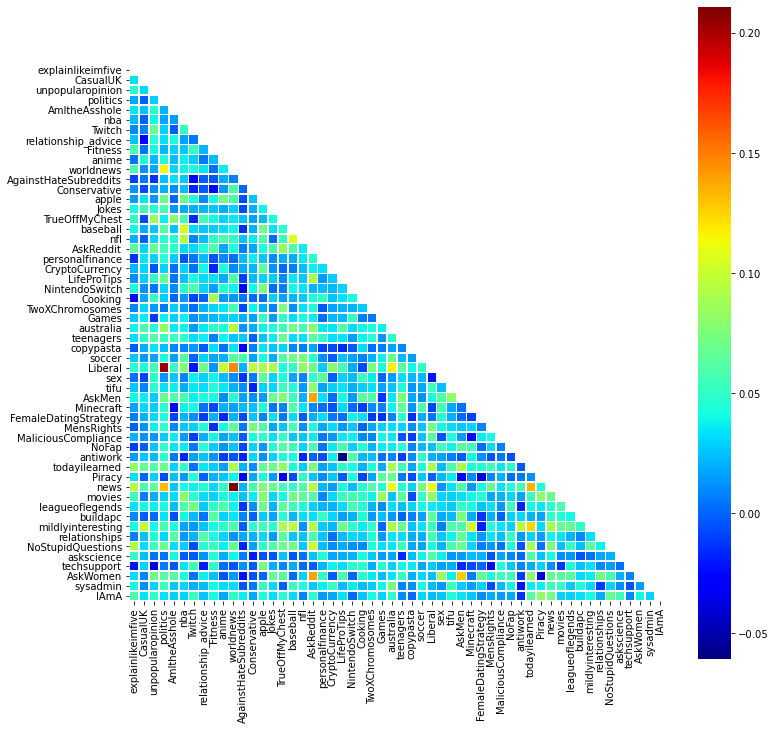

In [39]:
fig, ax = plt.subplots(figsize=(12,12))
hmap=sns.heatmap(lt.astype(float), cmap="jet", xticklabels=True, yticklabels=True, square=True, linewidths=0.5)

In [53]:
averages = df.mean(axis=0)
dOut = {}

for i in range(len(fileNames)):
    dOut[fileNames[i]] = averages[i]
    #print(f"{fileNames[i]}: {averages[i]}")

In [56]:
with open('pearsonAvgs.csv', 'w') as csvfile:
    
    csvwriter = csv.writer(csvfile)
    
    fields = ['subreddit', 'Mean Correlation']
    csvwriter.writerow(fields)

    for k, v in sorted(dOut.items(), key=lambda item: item[1], reverse = True):
        r = [k, v]
        csvwriter.writerow(r)